# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

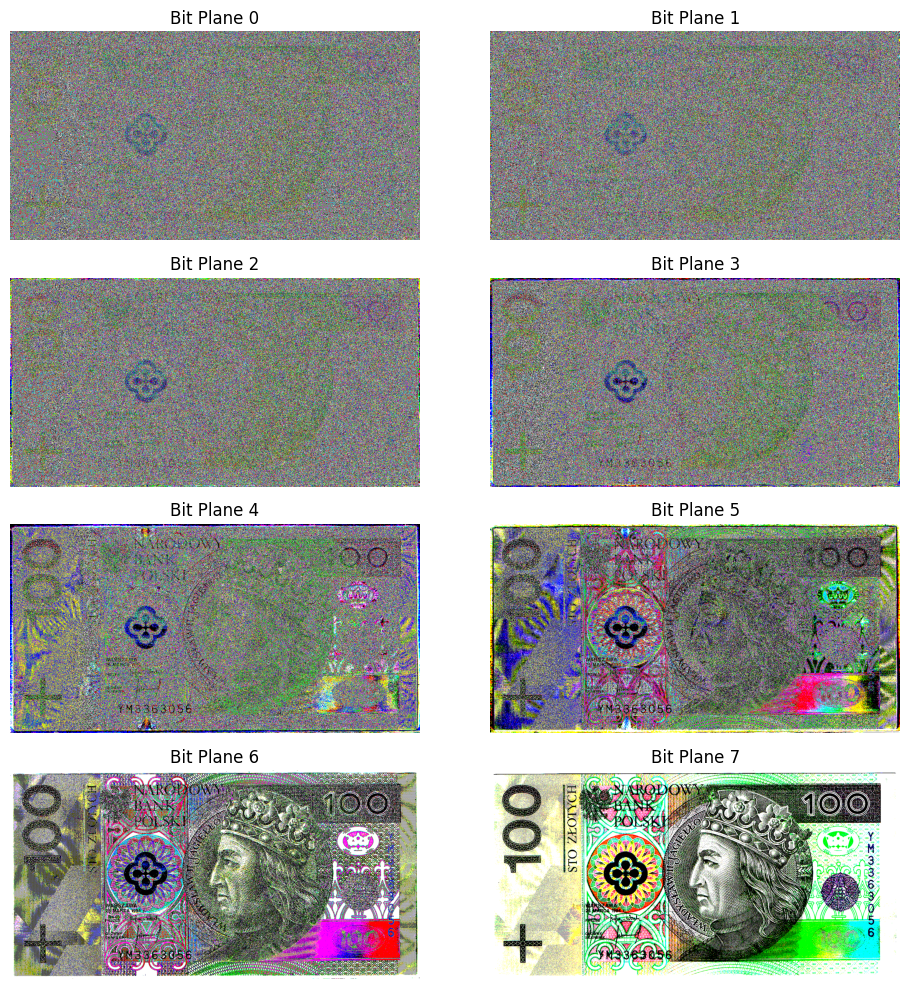

In [24]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

img = cv2.imread("100zloty.jpg")

def get_bit_planes(img):
    planes = []

    for bit in range(8):
        plane = (img >> bit) & 1
        planes.append(plane)

    return planes

planes = get_bit_planes(img)

fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for i in range(8):
    ax = axs[i // 2, i % 2]
    ax.imshow(planes[i] * 255)
    ax.set_title(f'Bit Plane {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

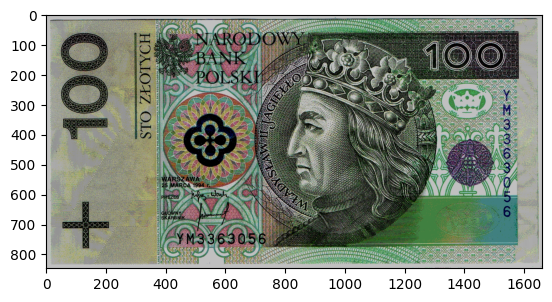

In [47]:
def reconstruct_image(planes, bits_to_use):
    reconstructed = np.zeros_like(planes[0], dtype=np.uint8)
    for bit in bits_to_use:
        reconstructed += (planes[bit] * (2 ** bit))
    return reconstructed

img_reconstructed_2bits = reconstruct_image(planes, [6, 7])

img_reconstructed_4bits = reconstruct_image(planes, [3,4,5,6])

plt.imshow(img_reconstructed_2bits)

